## This Jupyter Notebook accompanies the blog post [here](https://derekahneman.com/the-worlds-best-soccer-leagues/).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice, cycle
%matplotlib inline

### The section below analyzes match data available on the FiveThirtyEight site.

In [2]:
matches = pd.read_csv('https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv')

Head, info, and describe help us get an understanding of the dataset.

In [3]:
matches.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67808 entries, 0 to 67807
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       67808 non-null  int64  
 1   date         67808 non-null  object 
 2   league_id    67808 non-null  int64  
 3   league       67808 non-null  object 
 4   team1        67808 non-null  object 
 5   team2        67808 non-null  object 
 6   spi1         67808 non-null  float64
 7   spi2         67808 non-null  float64
 8   prob1        67808 non-null  float64
 9   prob2        67808 non-null  float64
 10  probtie      67808 non-null  float64
 11  proj_score1  67808 non-null  float64
 12  proj_score2  67808 non-null  float64
 13  importance1  58046 non-null  float64
 14  importance2  58046 non-null  float64
 15  score1       63548 non-null  float64
 16  score2       63548 non-null  float64
 17  xg1          34355 non-null  float64
 18  xg2          34355 non-null  float64
 19  nsxg

In [5]:
matches.describe()

,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,67808.00000,67808.000000,67808.000000,67808.000000,67808.000000,67808.000000,67808.000000,67808.000000,67808.000000,58046.000000,58046.000000,63548.000000,63548.000000,34355.000000,34355.000000,34355.000000,34355.000000,34355.000000,34355.000000
mean,2019.59319,2252.033978,43.420647,43.382337,0.441654,0.304903,0.253443,1.492652,1.173882,31.856061,31.253904,1.496491,1.182523,1.497389,1.186342,1.385489,1.134522,1.515685,1.194068
std,1.82444,1093.607236,19.036660,19.042934,0.156033,0.142642,0.046586,0.417593,0.412096,26.035717,25.779558,1.272743,1.138081,0.834174,0.745260,0.648332,0.577668,1.240101,1.123592
min,2016.00000,1818.000000,3.060000,3.120000,0.027000,0.003200,0.000000,0.210000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.00000,1854.000000,29.840000,29.840000,0.341400,0.210200,0.235400,1.220000,0.910000,11.800000,11.400000,1.000000,0.000000,0.880000,0.630000,0.930000,0.730000,1.050000,0.000000
50%,2020.00000,1879.000000,41.430000,41.340000,0.432700,0.289500,0.260700,1.430000,1.120000,26.700000,25.900000,1.000000,1.000000,1.360000,1.050000,1.290000,1.040000,1.050000,1.050000
75%,2021.00000,2160.000000,56.240000,56.182500,0.532300,0.381400,0.281300,1.700000,1.390000,45.900000,45.300000,2.000000,2.000000,1.970000,1.590000,1.730000,1.440000,2.100000,2.100000
max,2023.00000,10281.000000,96.570000,96.780000,0.977500,0.899200,0.453700,4.900000,4.130000,100.000000,100.000000,11.000000,13.000000,7.070000,8.270000,6.890000,7.170000,9.150000,11.050000


In [6]:
def column_summary(df):
    """
    Prints number of unique values by column, and first five unique values in dataframe.
    """
    for column in df:
        num_unique = df[column].nunique()
        first_five = df[column].unique()[:5]
        print(f'{column}:\t{num_unique} unique values\t{first_five}'.expandtabs(15))

column_summary(matches)

season:        8 unique values               [2016 2017 2018 2019 2020]
date:          2363 unique values            ['2016-07-09' '2016-07-10' '2016-07-16' '2016-07-17' '2016-07-24']
league_id:     40 unique values              [7921 1843 2411 1869 1854]
league:        40 unique values              ["FA Women's Super League" 'French Ligue 1' 'Barclays Premier League'
 'Spanish Primera Division' 'Italy Serie A']
team1:         888 unique values             ['Liverpool Women' 'Arsenal Women' 'Chelsea FC Women' 'Reading'
 'Notts County Ladies']
team2:         888 unique values             ['Reading' 'Notts County Ladies' 'Birmingham City' 'Arsenal Women'
 'Manchester City Women']
spi1:          8647 unique values            [51.56 46.61 59.85 53.   59.43]
spi2:          8662 unique values            [50.42 54.03 54.64 52.35 60.99]
prob1:         8081 unique values            [0.4389 0.3572 0.4799 0.4289 0.4124]
prob2:         7323 unique values            [0.2767 0.3608 0.2487 0.2699 0.3

In [7]:
matches['league'].unique()

array(["FA Women's Super League", 'French Ligue 1',
       'Barclays Premier League', 'Spanish Primera Division',
       'Italy Serie A', 'German Bundesliga', 'UEFA Champions League',
       'Mexican Primera Division Torneo Clausura', 'Major League Soccer',
       'Swedish Allsvenskan', 'Norwegian Tippeligaen',
       "National Women's Soccer League", 'Brasileiro Série A',
       'Russian Premier Liga', 'Mexican Primera Division Torneo Apertura',
       'Austrian T-Mobile Bundesliga', 'Swiss Raiffeisen Super League',
       'French Ligue 2', 'German 2. Bundesliga',
       'English League Championship', 'Scottish Premiership',
       'Portuguese Liga', 'Dutch Eredivisie',
       'Turkish Turkcell Super Lig', 'Spanish Segunda Division',
       'Italy Serie B', 'Argentina Primera Division',
       'UEFA Europa League', 'United Soccer League', 'Danish SAS-Ligaen',
       'Belgian Jupiler League', 'Japanese J League',
       'Chinese Super League', 'English League One',
       'South Africa

In [8]:
# merge the two tournaments for Liga MX into one league
matches.loc[matches['league'].isin(['Mexican Primera Division Torneo Apertura', 
                                    'Mexican Primera Division Torneo Clausura']),
    'league'] = 'Mexican Primera Division'

# confirm that the Liga MX tournaments have been merged
matches['league'].unique()

array(["FA Women's Super League", 'French Ligue 1',
       'Barclays Premier League', 'Spanish Primera Division',
       'Italy Serie A', 'German Bundesliga', 'UEFA Champions League',
       'Mexican Primera Division', 'Major League Soccer',
       'Swedish Allsvenskan', 'Norwegian Tippeligaen',
       "National Women's Soccer League", 'Brasileiro Série A',
       'Russian Premier Liga', 'Austrian T-Mobile Bundesliga',
       'Swiss Raiffeisen Super League', 'French Ligue 2',
       'German 2. Bundesliga', 'English League Championship',
       'Scottish Premiership', 'Portuguese Liga', 'Dutch Eredivisie',
       'Turkish Turkcell Super Lig', 'Spanish Segunda Division',
       'Italy Serie B', 'Argentina Primera Division',
       'UEFA Europa League', 'United Soccer League', 'Danish SAS-Ligaen',
       'Belgian Jupiler League', 'Japanese J League',
       'Chinese Super League', 'English League One',
       'South African ABSA Premier League', 'English League Two',
       'Greek Super L

In [9]:
# make a dataset with one team per row
team1 = matches[['season', 'date', 'league', 'team1', 'spi1']].rename(columns={"team1": "team", "spi1": "spi"})
team2 = matches[['season', 'date', 'league', 'team2', 'spi2']].rename(columns={"team2": "team", "spi2": "spi"})
matches_long = pd.concat([team1, team2])
matches_long.head()

,season,date,league,team,spi
0,2016,2016-07-09,FA Women's Super League,Liverpool Women,51.56
1,2016,2016-07-10,FA Women's Super League,Arsenal Women,46.61
2,2016,2016-07-10,FA Women's Super League,Chelsea FC Women,59.85
3,2016,2016-07-16,FA Women's Super League,Liverpool Women,53.00
4,2016,2016-07-17,FA Women's Super League,Chelsea FC Women,59.43


In [10]:
# find average elo for teams within a season/league
team_elo_by_year = matches_long.groupby(['season', 'league', 'team'])['spi'].mean()
team_elo_by_year.head()

season  league                   team           
2016    Barclays Premier League  AFC Bournemouth    60.875000
                                 Arsenal            81.980000
                                 Burnley            57.717632
                                 Chelsea            84.537632
                                 Crystal Palace     58.505789
Name: spi, dtype: float64

In [11]:
# find average elo for leagues by season
league_elo_by_year = matches_long.groupby(['season', 'league'])['spi'].mean().to_frame().reset_index()
league_elo_by_year.head()

,season,league,spi
0,2016,Barclays Premier League,66.050579
1,2016,FA Women's Super League,54.439348
2,2016,French Ligue 1,59.510553
3,2016,German Bundesliga,70.180359
4,2016,Italy Serie A,61.264658


In [12]:
womens_leagues = ["FA Women's Super League", "National Women's Soccer League", 'NWSL Challenge Cup']

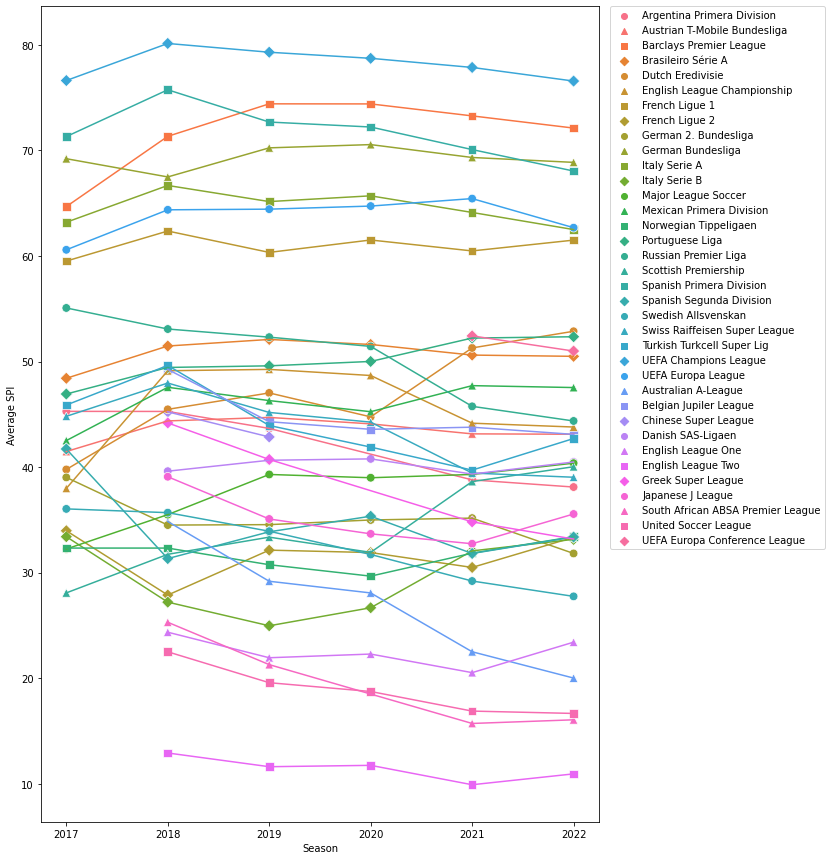

In [13]:
# plot men's leagues from 2017-2022
plotdata = league_elo_by_year[league_elo_by_year['season'].between(2017,2022)]
plotdata = plotdata[~plotdata['league'].isin(womens_leagues)]

# create marker list for plot
markers = list(islice(cycle(['o', '^', 's', 'D']), plotdata['league'].nunique()))
     
plt.figure(figsize=(10,15))
sns.lineplot(x='season', y='spi', data=plotdata, hue='league', legend=False)
sns.scatterplot(x='season', y='spi', data=plotdata, hue='league', style='league', markers=markers, s=75)
plt.xlabel("Season")
plt.ylabel("Average SPI")
plt.xticks(range(2017, 2023))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

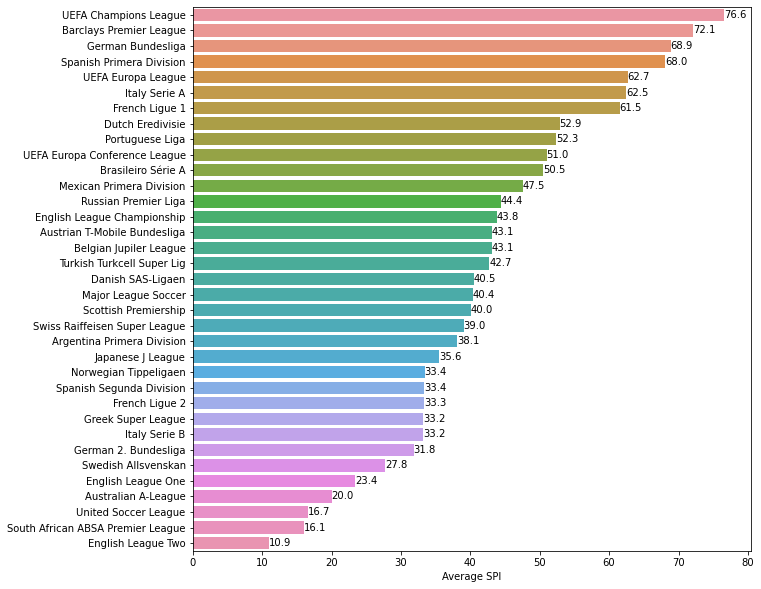

In [14]:
# barchart as of 2022
plotdata = league_elo_by_year[league_elo_by_year['season'] == 2022]
plotdata = plotdata[~plotdata['league'].isin(womens_leagues)]

plt.figure(figsize=(10,10))
ax = sns.barplot(x='spi', y='league', data=plotdata, order=plotdata.sort_values('spi', ascending=False)['league'])
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xlabel('Average SPI')
plt.ylabel(None)
plt.show()

### The section below analyzes data scraped from the FiveThirtyEight site.

One challenge that arose while scraping SPIs and forecasts from the site were a series of WebDriver errors that could not be consistently reproduced.  For example, scraping numbers from a given league would work fine on one run but fail the next.  This issue seemed primarily to occur on .click() methods, and adding pauses to preceding code did not resolve the issue.  To circumvent the issue, I saved the data for each league to separate CSV files as it was scraped.  For each subsequent run, if a CSV file already existed for a league, that league was skipped.  While inelegant, this method scraped and saved the data for all leagues after a handful of runs.

In [15]:
# NOTE: Chrome must be installed and version-matched webdriver must be 
# installed and added to PATH

# NOTE: The bottom code chunk will only run if the output/ folder does not already have the .csv
# files inside of it.  In such case, this entire cell will likely need to be run multiple times
# because the webdriver errors out every once in a while.  Just keep running this cell until 
# all of the leagues have a .csv file saved for them.

from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup
import pandas as pd
import os.path

URL = 'https://projects.fivethirtyeight.com/soccer-predictions/'

opts = webdriver.ChromeOptions()
opts.add_argument('headless') # prevents browser window from appearing
driver = webdriver.Chrome(options=opts)
driver.get(URL)

# find league names and abbreviations from dropdown
league_elements = driver.find_element(By.ID, 'leagueselector').find_elements(By.CLASS_NAME, 'nav-option')
leagues = {}
for element in league_elements:
    leagues[element.get_attribute('value')] = element.text.strip()
driver.close() 

for league_abbr, league in leagues.items():
    if not league_abbr == 'mls-is-back':  # mls is back has a different site structure (no season dropdown)
        if not os.path.exists('output/' + league_abbr + '.csv'):  
            df = pd.DataFrame(columns = ['league', 'season', 'team', 'spi', 'win_forecast'])

            driver = webdriver.Chrome(options=opts)
            driver.get(f"{URL}{league_abbr}/")

            # this is to find the list of years for a given league
            year_elements = driver.find_element(By.ID, 'season-selector').find_elements(By.TAG_NAME, 'option')
            years = [element.get_attribute('value') for element in year_elements]

            for year in years:
                # choose year in dropdown
                xpath = "//option[@value='" + year + "']"
                driver.find_element(By.ID, 'season-selector').find_element(By.XPATH, xpath).click()
                time.sleep(2)

                print(league_abbr + ": " + year)

                # choose forecast date
                forecast_elements = driver.find_element(By.ID, 'forecast-selector').find_elements(By.TAG_NAME, 'option')
                forecast_elements[len(forecast_elements)-1].click()  # first forecast of the season
                time.sleep(2)

                soup = BeautifulSoup(driver.page_source, 'lxml')
                forecast_table_rows = soup.find('table', class_='forecast-table').find('tbody').find_all('tr', class_='team-row')

                for tr in forecast_table_rows:
                    team = tr['data-str']

                    spi_td = tr.find('td', class_=['num rating overall drop-6'])
                    if spi_td is None:
                        spi = np.nan
                    else:
                        spi = spi_td['data-val']

                    # mls cup %age cell has same class as playoff %, so have to grab final column
                    win_forecast = tr.find_all('td', class_=['pct'])[-1]['data-val']  # MLS Cup, not SS

                    new_row = pd.DataFrame([{
                        'league' : league, 
                        'season' : year,
                        'team' : team,
                        'spi' : spi,
                        'win_forecast' : win_forecast,
                    }])
                    df = pd.concat([df, new_row])

            df.to_csv('output/' + league_abbr + '.csv', index=False)

In [16]:
# read the data in
df_master = pd.DataFrame(columns = ['league', 'season', 'team', 'spi', 'win_forecast'])

for league_abbr in leagues.keys():
    if league_abbr != 'mls-is-back':  # leave out 'MLS is Back'
        new_df = pd.read_csv('output/' + league_abbr + '.csv')

        df_master = pd.concat([df_master, new_df])

df_master.to_csv('output/all-leagues.csv', index=False)
df_master.head()

,league,season,team,spi,win_forecast
0,UEFA Champions League,2022,Bayern Munich,92.96238,0.20965
1,UEFA Champions League,2022,Manchester City,92.00082,0.1813
2,UEFA Champions League,2022,Paris Saint-Germain,90.43453,0.13715
3,UEFA Champions League,2022,Liverpool,88.83062,0.0867
4,UEFA Champions League,2022,Real Madrid,86.65894,0.06515


In [17]:
for key, value in leagues.items():
    print(key + '  :  ' + value)

champions-league  :  UEFA Champions League
europa-league  :  UEFA Europa League
europa-conference-league  :  UEFA Europa Conference League
bundesliga-austria  :  Austria: Bundesliga
first-division-a  :  Belgium: First Division A
superligaen  :  Denmark: Superliga
premier-league  :  England: Premier League
championship  :  England: Championship
league-one  :  England: League One
league-two  :  England: League Two
fa-wsl  :  England: Women's Super League
ligue-1  :  France: Ligue 1
ligue-2  :  France: Ligue 2
bundesliga  :  Germany: Bundesliga
bundesliga-2  :  Germany: 2. Bundesliga
super-league-greece  :  Greece: Super League
serie-a  :  Italy: Serie A
serie-b  :  Italy: Serie B
eredivisie  :  Netherlands: Eredivisie
eliteserien  :  Norway: Eliteserien
primeira-liga  :  Portugal: Primeira Liga
premier-league-russia  :  Russia: Premier League
premiership  :  Scotland: Premiership
la-liga  :  Spain: La Liga
la-liga-2  :  Spain: La Liga 2
allsvenskan  :  Sweden: Allsvenskan
super-league  :

In [18]:
# remove women's leagues
womens_leagues = ["England: Women's Super League", 'USA: NWSL', 'USA: NWSL Challenge Cup']
df_master = df_master[~df_master['league'].isin(womens_leagues)] 

print(df_master['league'].unique())

['UEFA Champions League' 'UEFA Europa League'
 'UEFA Europa Conference League' 'Austria: Bundesliga'
 'Belgium: First Division A' 'Denmark: Superliga'
 'England: Premier League' 'England: Championship' 'England: League One'
 'England: League Two' 'France: Ligue 1' 'France: Ligue 2'
 'Germany: Bundesliga' 'Germany: 2. Bundesliga' 'Greece: Super League'
 'Italy: Serie A' 'Italy: Serie B' 'Netherlands: Eredivisie'
 'Norway: Eliteserien' 'Portugal: Primeira Liga' 'Russia: Premier League'
 'Scotland: Premiership' 'Spain: La Liga' 'Spain: La Liga 2'
 'Sweden: Allsvenskan' 'Switzerland: Super League' 'Turkey: Süper Lig'
 'Mexico: Liga MX' 'USA: MLS' 'USA: USL Championship'
 'Argentina: Primera División' 'Brazil: Brasileirão' 'Australia: A-League'
 'China: Super League' 'Japan: J1 League' 'South Africa: Premier Division']


In [19]:
# recode Liga MX seasons
old = ['2016c', '2017a', '2017c', '2018a', '2018c', '2019a', '2019c', 
       '2020a', '2020c', '2021a', '2021c', '2022a', '2022c']
new = ['2016',  '2017',  '2017',  '2018',  '2018',  '2019',  '2019', 
       '2020',  '2020',  '2021',  '2021',  '2022',  '2022']
df_master['season'] = df_master['season'].replace(old, new)
df_master = df_master.astype({'season': 'int'})

In [20]:
# calculate Parity index (1 - Gini)
def parity(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    gini = total / (len(x)**2 * np.mean(x))
    return 1 - gini

# calculate average Elo and Parity index for each league by year
df_summary = df_master.groupby(['season', 'league']).agg(spi=('spi', 'mean'), 
                                                         parity=('win_forecast', parity)).reset_index()
df_summary.tail()

,season,league,spi,parity
201,2022,USA: MLS,39.443008,0.531107
202,2022,USA: USL Championship,16.262514,0.474485
203,2023,Argentina: Primera División,38.868836,0.332400
204,2023,USA: MLS,41.096043,0.472134
205,2023,USA: USL Championship,17.320547,0.456217


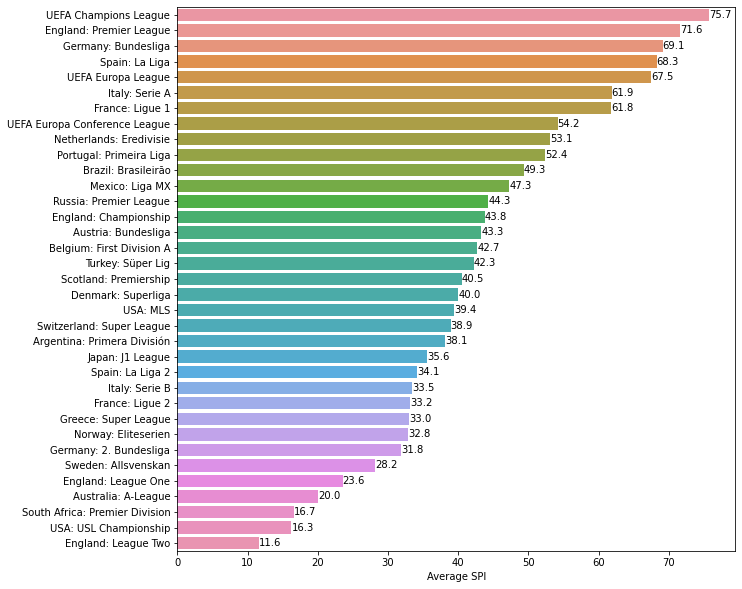

In [21]:
# create barchart of league quality in 2022
plotdata = df_summary[df_summary['season'] == 2022]

plt.figure(figsize=(10,10))
ax = sns.barplot(x='spi', y='league', data=plotdata, order=plotdata.sort_values('spi', ascending=False)['league'])
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xlabel('Average SPI')
plt.ylabel(None)
plt.show()

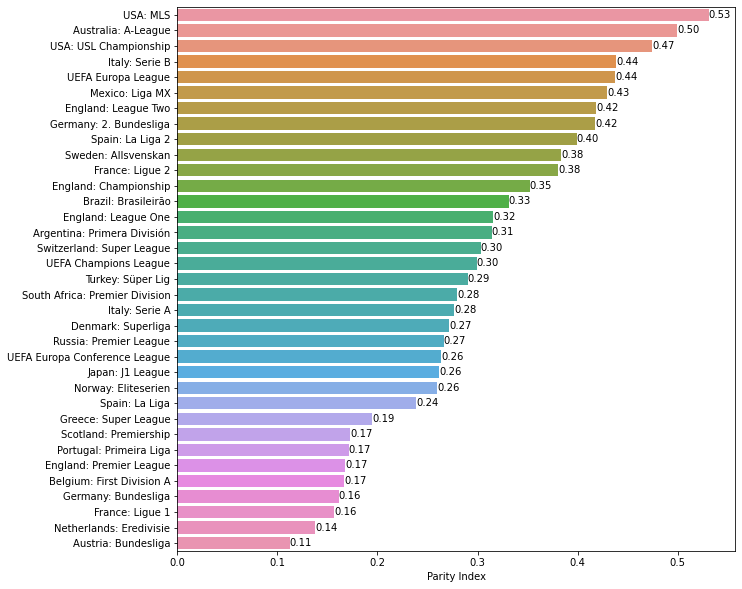

In [22]:
# create barchart of league parity in 2022
plotdata = df_summary[df_summary['season'] == 2022]

plt.figure(figsize=(10,10))
ax = sns.barplot(x='parity', y='league', data=plotdata, order=plotdata.sort_values('parity', ascending=False)['league'])
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xlabel('Parity Index')
plt.ylabel(None)
plt.show()

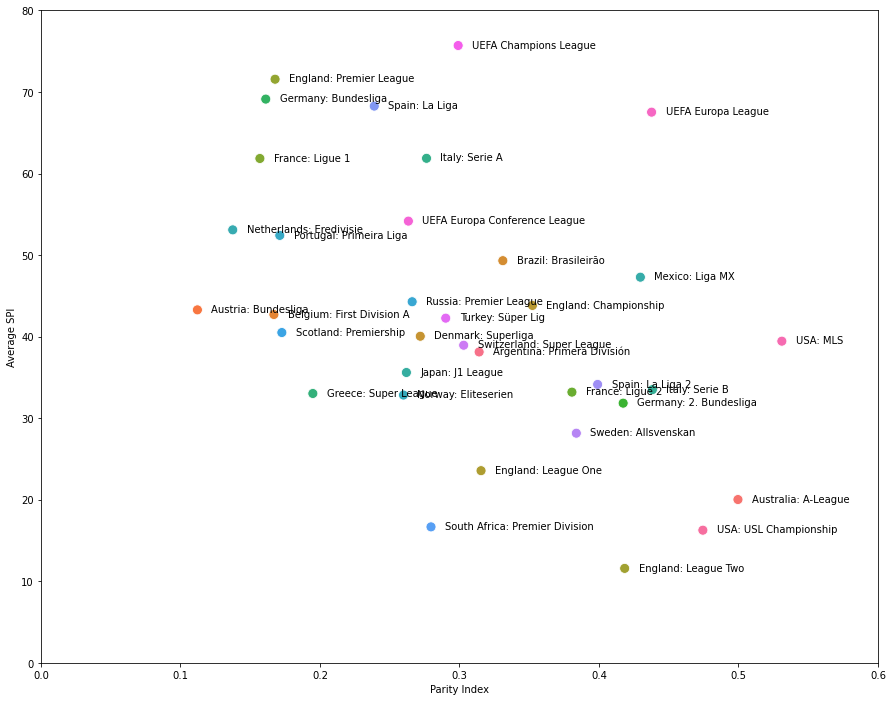

In [23]:
# plot quality vs. parity for 2022
plotdata = df_summary.loc[df_summary['season'] == 2022]

plt.figure(figsize=(15,12))
sns.scatterplot(data=plotdata, x='parity', y='spi', hue='league', legend=False, s=100) # , markers=markers, s=75)
plt.ylim(0, 80)
plt.xlim(0, 0.6)
plt.xlabel('Parity Index')
plt.ylabel('Average SPI')

# label plot points
for i, row in plotdata.iterrows():
    plt.text(plotdata['parity'][i]+0.01, plotdata['spi'][i]-0.3, plotdata['league'][i])
    
plt.show()

In [24]:
# hard-coded calculation of Parity index for 2022 MLS Supporter's Shield
mls2022ss = [
    0.1811, 0.13205, 0.09505, 0.0996, 0.0488, 0.0504, 0.04215, 0.03625, 0.03255,
    0.03315, 0.03125, 0.0258, 0.02375, 0.0249, 0.0248, 0.0223, 0.014, 0.0118, 
    0.01265, 0.01275, 0.0119, 0.0117, 0.00645, 0.00515, 0.00405, 0.00245, 0.0025, 0.0007,
]

print(sum(mls2022ss))
print(parity(np.array(mls2022ss)))

1.0000000000000002
0.45644285714285726
